In [31]:
# Import the required modules
import pandas as pd
from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix, f1_score, accuracy_score
import seaborn as sns

import matplotlib.pyplot as plt

##### Data Manipulation 

In [32]:
# Read the usage_stats.csv file from the Resources folder into a Pandas DataFrame
GeneticDisorder_df = pd.read_csv(
    Path(r"Resources\train.csv")
)

# Review the DataFrame
display(GeneticDisorder_df.head())
display(GeneticDisorder_df.tail())

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome
22082,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [33]:
# Get column names and data
GeneticDisorder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [34]:
# Drop unnecessary columns from the training dataset
columns_to_remove = ['Patient Id', 'Patient First Name', 'Family Name', 'Father\'s name', 'Mother\'s age', ' Father\'s age', 'Institute Name', 'Location of Institute','Test 1','Test 2','Test 3','Test 4','Test 5','Symptom 1','Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5','Parental consent', 'Disorder Subclass']
columns_to_remove_train = [col for col in columns_to_remove if col in GeneticDisorder_df.columns]
GeneticDisorder_cleaned_df = GeneticDisorder_df.drop(columns=columns_to_remove_train)

In [35]:
# Count the number of NaN values in each column
nan_counts = GeneticDisorder_cleaned_df.isna().sum()

# Display the results
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Father's age                                        5986
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Follow-up                                           2166
Gender                                              2173
Birth asphyxia                                      2139
Autopsy shows birth defect (if applicable)          4392
Place of birth                                      2124
Folic acid details (peri-conceptional)              2117
H/O serious maternal illness                       

In [36]:
# Drop rows with missing values
GeneticDisorder_dropped_df = GeneticDisorder_cleaned_df.dropna()

In [37]:
# Confirm no NaN values are reflected
nan_counts_after_drop = GeneticDisorder_dropped_df.isna().sum()
print("\nNumber of NaN values in each column after dropping rows:")
print(nan_counts_after_drop)


Number of NaN values in each column after dropping rows:
Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Place of birth                                      0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
H/O radiation exposure (

In [38]:
# Confirm that are no duplicate rows
duplicate_count = GeneticDisorder_dropped_df.duplicated().sum()

print("Count of duplicate rows:", duplicate_count)

# X_train_no_duplicates = GeneticDisorder_dropped_df.drop_duplicates()

Count of duplicate rows: 0


In [39]:
GeneticDisorder_dropped_df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,...,H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder
8,11.0,No,No,Yes,No,5.209058,44.0,Alive,Tachypnea,Tachycardia,...,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,Mitochondrial genetic inheritance disorders
9,4.0,No,Yes,Yes,Yes,4.752272,42.0,Alive,Tachypnea,Tachycardia,...,No,No,No,Yes,Yes,1.0,Multiple,6.397702,abnormal,Multifactorial genetic inheritance disorders
14,6.0,Yes,No,Yes,No,4.620420,20.0,Alive,Tachypnea,Tachycardia,...,Yes,Yes,-,No,No,3.0,Multiple,3.000000,slightly abnormal,Mitochondrial genetic inheritance disorders
18,10.0,Yes,Yes,Yes,No,4.751452,57.0,Deceased,Normal (30-60),Tachycardia,...,No,Yes,No,Yes,Yes,3.0,Singular,9.382407,abnormal,Mitochondrial genetic inheritance disorders
19,6.0,No,Yes,Yes,Yes,4.876896,48.0,Deceased,Tachypnea,Normal,...,Yes,No,No,Yes,No,1.0,Singular,7.370477,normal,Single-gene inheritance diseases


In [40]:
# Export cleaned CSV data
GeneticDisorder_dropped_df.to_csv('Resources/genetic_disorder.csv', index=False)

###### Create the labels

In [41]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = ['Genetic Disorder']

# The X variable should include all features except the target
X = GeneticDisorder_dropped_df.drop(columns=['Genetic Disorder'])

In [42]:
# Identify categorical columns and perform one-hot encoding only on features
categorical_columns = X.select_dtypes(include=['object']).columns
GeneticDisorder_encoded_df = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


In [43]:
GeneticDisorder_encoded_df

,Patient Age,Blood cell count (mcL),Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side_Yes,Inherited from father_Yes,Maternal gene_Yes,Paternal gene_Yes,Status_Deceased,...,H/O radiation exposure (x-ray)_Yes,H/O substance abuse_No,H/O substance abuse_Not applicable,H/O substance abuse_Yes,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_Yes,Birth defects_Singular,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal
8,11.0,5.209058,44.0,0.0,6.669552,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
9,4.0,4.752272,42.0,1.0,6.397702,False,True,True,True,False,...,False,True,False,False,True,True,False,False,False,False
14,6.0,4.620420,20.0,3.0,3.000000,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
18,10.0,4.751452,57.0,3.0,9.382407,True,True,True,False,True,...,True,True,False,False,True,True,True,False,False,False
19,6.0,4.876896,48.0,1.0,7.370477,False,True,True,True,True,...,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22057,6.0,5.117296,27.0,3.0,3.453291,False,True,False,True,False,...,False,False,True,False,False,True,True,False,False,True
22066,13.0,4.777036,58.0,1.0,3.000736,False,True,False,True,False,...,False,False,False,False,False,True,True,False,True,False
22068,4.0,5.077554,34.0,1.0,9.566549,True,False,False,False,True,...,False,False,True,False,False,False,True,True,False,False
22076,0.0,4.931758,50.0,1.0,11.649052,True,False,True,False,False,...,False,True,False,False,True,True,True,False,False,False


In [44]:
#Scale the data
# Data focuses on "Patient Age" and "Blood cell count (mcL)" columns only 
X, y = make_blobs(centers=2, random_state=1, cluster_std=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

###### Split the data into training and testing datasets by using `train_test_split`

In [45]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9)

# Fit and save the logistic regression model using the data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [47]:
#Generate training predictions
GDtraining_predictions = lr_model.predict(X_train)

#Generate testing predictions
GDtesting_predictions = logistic_regression_model.predict(X_test)

In [48]:
# Create and save the confusion matrix for the training data
GDtraining_matrix = confusion_matrix(y_train, GDtraining_predictions)

# Print the confusion matrix for the training data
print("Confusion Matrix for Logistic Regression model:")
print(GDtraining_matrix)

Confusion Matrix for Logistic Regression model:
[[40  0]
 [ 0 35]]


In [49]:
# Create and save the confusion matrix for the testing data
GDtesting_matrix = confusion_matrix(y_test, GDtesting_predictions)

# Print the confusion matrix for the testing data
print("Confusion Matrix for Logistic Regression model:")
print(GDtesting_matrix)

Confusion Matrix for Logistic Regression model:
[[10  0]
 [ 0 15]]


In [50]:
# Create and save the training classification report
GDtraining_report = classification_report(y_train, GDtraining_predictions)

# Print the training classification report
print("Classification Report for Logistic Regression model:")
print(GDtraining_report)

Classification Report for Logistic Regression model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [51]:
# Create and save the testing classification report
GDtesting_report = classification_report(y_test, GDtesting_predictions)

# Print the testing classification report
print("Classification Report for Logistic Regression model:")
print(GDtesting_report)

Classification Report for Logistic Regression model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [52]:
# Print the balanced_accuracy score of the model
print(f"The balanced_accuracy score of the model: {balanced_accuracy_score(y_test, GDtesting_predictions)}")

The balanced_accuracy score of the model: 1.0


Create a Logistics Regression Model with Predictions Using Genetic Disorder

In [53]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [54]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [55]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [56]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,0,0
8,0,0
9,1,1


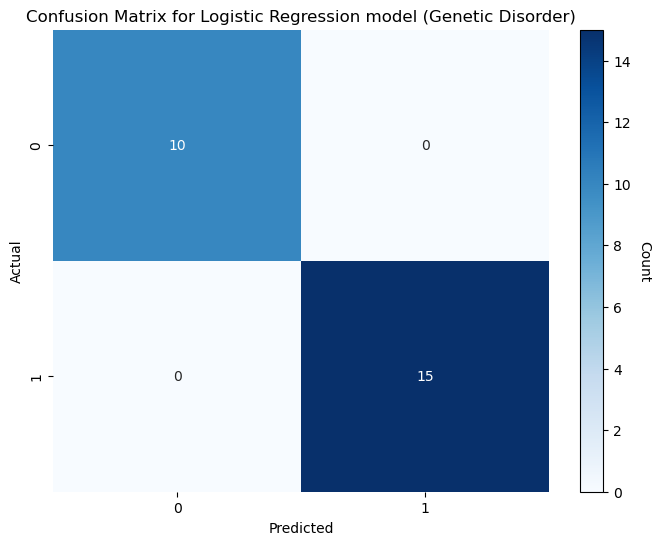

In [57]:
# Confusion Matrix Heatmap for Logistic Regression model
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(GDtesting_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression model (Genetic Disorder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add legend
cbar = heatmap.figure.colorbar(heatmap.collections[0])
cbar.set_label('Count', rotation=270, labelpad=15)

plt.show()

# The confusion matrix heatmap allows users to visually assess how well the Logistic Regression model \
# is performing in predicting the "Genetic Disorder" by comparing the predicted and actual classes. The goal is \
# to have higher counts along the diagonal (from the top left to the bottom right), indicating correct predictions, and \
# lower counts in off-diagonal cells, indicating misclassifications. The color intensity provides a quick visual summary \
# of the distribution of predictions.

In [58]:
# Assuming 'model' is your trained Logistic Regression model
coefficients = lr_model.coef_[0]

# Get the names of all features
all_feature_names = GeneticDisorder_encoded_df.columns

# Create a DataFrame to display feature names and their coefficients
feature_coefficients_df = pd.DataFrame({'Feature': all_feature_names[:len(coefficients)], 'Coefficient': coefficients})

# Display the DataFrame sorted by absolute coefficient values
feature_coefficients_df['Absolute Coefficient'] = feature_coefficients_df['Coefficient'].abs()
feature_coefficients_df = feature_coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top features and their coefficients
print(feature_coefficients_df)


# Coefficients indicate the strength and direction (positive or negative) of the relationship between each feature and the predicted outcome. \
# A negative coefficient suggests an inverse relationship between the feature and the predicted outcome. As "Patient Age" and "Blood cell count (mcL)" \
# have negative coefficients, an increase in these values is associated with a decrease in the predicted outcome (lower likelihood of a Genetic Disorder).
# Magnitude (Absolute Coefficient) of the coefficient indicates the strength of the relationship. Larger absolute values indicate a stronger influence on the predicted outcome.


                  Feature  Coefficient  Absolute Coefficient
0             Patient Age    -1.225647              1.225647
1  Blood cell count (mcL)    -0.945978              0.945978


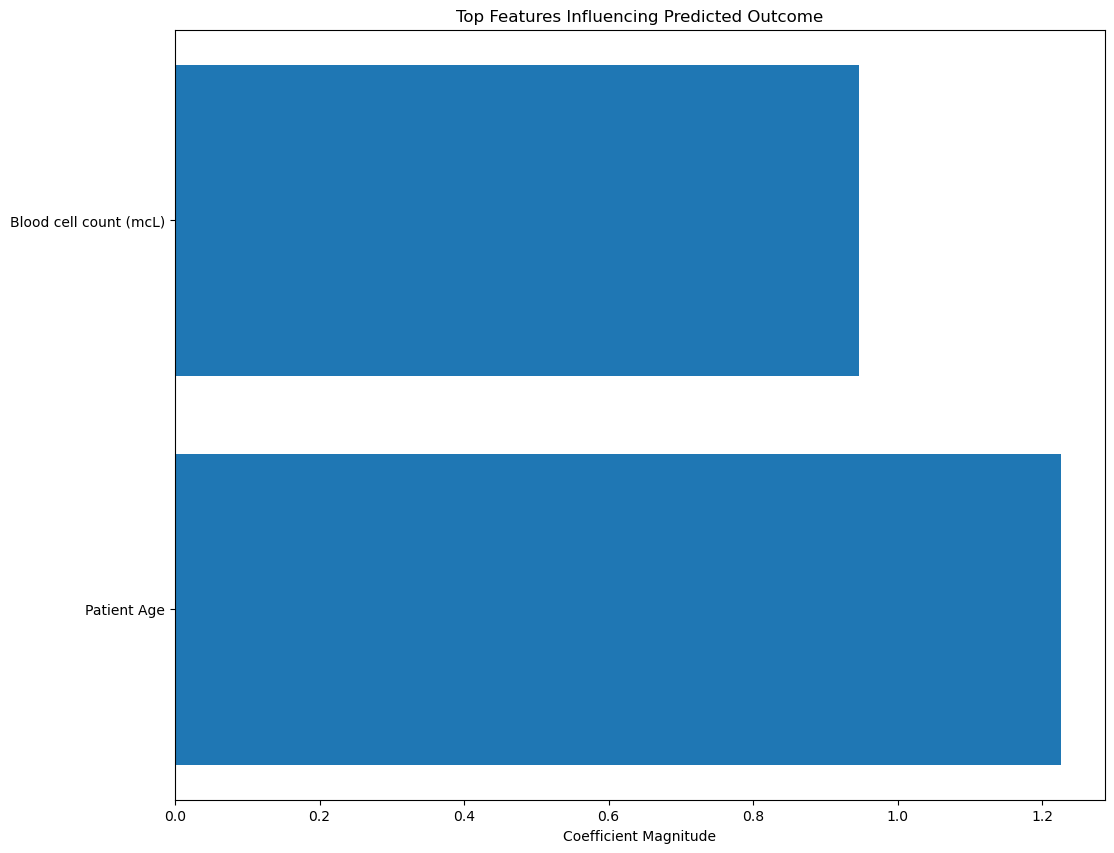

In [59]:
coefficients = lr_model.coef_[0]

# Get the absolute values of coefficients for feature importance
feature_importance = abs(coefficients)

# Get the names of all features
all_feature_names = GeneticDisorder_encoded_df.columns

# Get the indices of the top 20 features
top_20_indices = feature_importance.argsort()[-20:][::-1]

# Get the names and importance of the top 20 features
top_20_feature_names = all_feature_names[top_20_indices]
top_20_feature_importance = feature_importance[top_20_indices]

# Plot the top 20 features and their importance
plt.figure(figsize=(12, 10))
plt.barh(top_20_feature_names, top_20_feature_importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Top Features Influencing Predicted Outcome')
plt.show()

# This graph helps users identify and prioritize the most influential features for the logistic regression model. \
# "Coefficient Magnitude" is a measure of how much a feature contributes to the model's predictions, considering both \
# the positive and negative impacts. Larger magnitudes indicate features that have a more substantial influence on the predicted outcome.